In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
data1 = pd.read_csv("/content/Arumbakkam, Chennai - TNPCB.csv")
data2 = pd.read_csv("/content/Manali, Chennai - CPCB.csv")
data3 = pd.read_csv("/content/Perungudi, Chennai - TNPCB.csv")
data4 = pd.read_csv("/content/Velachery Res. Area, Chennai - CPCB.csv")
data5 = pd.read_csv("/content/Kodungaiyur, Chennai - TNPCB.csv")

In [ ]:
data1.tail()

,From Date,To Date,PM2.5,NO2,SO2,Temp,WS,WD,SR,RH
35132,31-12-2024 23:00,31-12-2024 23:15,80.0,5.2,5.0,28.0,1.8,NaN,57.0,96.0
35133,31-12-2024 23:15,31-12-2024 23:30,80.0,7.7,4.9,28.0,1.4,NaN,57.0,96.0
35134,31-12-2024 23:30,31-12-2024 23:45,80.0,8.1,5.1,28.1,1.8,NaN,57.0,96.0
35135,31-12-2024 23:45,01-01-2025 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35136,01-01-2025 00:00,01-01-2025 00:00,77.0,9.3,5.4,28.1,2.3,NaN,57.0,96.0


In [ ]:
data1 = data1[['To Date', 'PM2.5', 'RH']]
data2 = data2[['To Date', 'PM2.5', 'RH']]
data3 = data3[['To Date', 'PM2.5', 'RH']]
data4 = data4[['To Date', 'PM2.5', 'RH']]
data5 = data5[['To Date', 'PM2.5', 'RH']]

In [ ]:
data1.isna().sum()

,0
To Date,0
PM2.5,4531
RH,2734


In [ ]:
data1.dtypes

,0
To Date,object
PM2.5,float64
RH,float64


In [ ]:
data1['To Date'] = pd.to_datetime(data1['To Date'], format='%d-%m-%Y %H:%M')
data2['To Date'] = pd.to_datetime(data2['To Date'], format='%d-%m-%Y %H:%M')
data3['To Date'] = pd.to_datetime(data3['To Date'], format='%d-%m-%Y %H:%M')
data4['To Date'] = pd.to_datetime(data4['To Date'], format='%d-%m-%Y %H:%M')
data5['To Date'] = pd.to_datetime(data5['To Date'], format='%d-%m-%Y %H:%M')

In [ ]:
data1 = data1[:-1]
data2 = data2[:-1]
data3 = data3[:-1]
data4 = data4[:-1]
data5 = data5[:-1]

In [ ]:
for i in range(1, 6):
    df = globals()[f'data{i}']
    df = df.set_index('To Date').sort_index()
    df[['PM2.5', 'RH']] = df[['PM2.5', 'RH']].interpolate(method='time')
    df[['PM2.5', 'RH']] = df[['PM2.5', 'RH']].fillna(method='ffill').fillna(method='bfill')
    globals()[f'data{i}'] = df

<ipython-input-9-e969b7ca07a8>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['PM2.5', 'RH']] = df[['PM2.5', 'RH']].fillna(method='ffill').fillna(method='bfill')
<ipython-input-9-e969b7ca07a8>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['PM2.5', 'RH']] = df[['PM2.5', 'RH']].fillna(method='ffill').fillna(method='bfill')
<ipython-input-9-e969b7ca07a8>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['PM2.5', 'RH']] = df[['PM2.5', 'RH']].fillna(method='ffill').fillna(method='bfill')
<ipython-input-9-e969b7ca07a8>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['PM2.5', 'RH']] = df[['PM2.5', 'RH']].fillna

In [ ]:
data5.tail()

,PM2.5,RH
To Date,,
2024-12-31 23:00:00,23.0,70.0
2024-12-31 23:15:00,23.0,72.0
2024-12-31 23:30:00,23.0,73.0
2024-12-31 23:45:00,23.0,70.0
2025-01-01 00:00:00,23.0,70.0


In [ ]:
# Rename columns for data1 to data4
for i in range(1, 5):
    df = globals()[f'data{i}']
    df.columns = [f'{col}_{i}' for col in df.columns]
    globals()[f'data{i}'] = df

# Join all DataFrames on 'To Date' index
df = data5.join([data1,data2, data3, data4], how='inner')

# Optional: sort index if needed
df = df.sort_index()

In [ ]:
df.tail()

,PM2.5,RH,PM2.5_1,RH_1,PM2.5_2,RH_2,PM2.5_3,RH_3,PM2.5_4,RH_4
To Date,,,,,,,,,,
2024-12-31 23:00:00,23.0,70.0,80.0,96.0,72.5,98.77,84.0,83.0,89.35,91.50
2024-12-31 23:15:00,23.0,72.0,80.0,96.0,72.5,98.77,84.0,84.0,107.83,91.51
2024-12-31 23:30:00,23.0,73.0,80.0,96.0,72.5,98.77,84.0,84.0,127.13,91.51
2024-12-31 23:45:00,23.0,70.0,80.0,96.0,72.5,98.77,84.0,85.0,127.13,91.52
2025-01-01 00:00:00,23.0,70.0,80.0,96.0,72.5,98.77,84.0,85.0,127.13,91.52


In [ ]:
df.isna().sum()

,0
PM2.5,0
RH,0
PM2.5_1,0
RH_1,0
PM2.5_2,0
RH_2,0
PM2.5_3,0
RH_3,0
PM2.5_4,0
RH_4,0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df['Day'] = df['To Date'].dt.day
df['Hour'] = df['To Date'].dt.hour
df['Quadrant'] = df['To Date'].dt.minute // 15

In [ ]:
df.drop(columns=['To Date'], inplace=True)

In [ ]:
features = ['PM2.5', 'RH', 'PM2.5_1', 'RH_1', 'PM2.5_2', 'RH_2',
            'PM2.5_3', 'RH_3', 'PM2.5_4', 'RH_4', 'Day', 'Hour', 'Quadrant']

# Filter and scale data
data = df[features].dropna().values

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 12
X_raw, y_raw = create_sequences(data, n_steps)

In [ ]:
train_size = int(0.8 * len(X_raw))
X_train_raw, X_test_raw = X_raw[:train_size], X_raw[train_size:]
y_train_raw, y_test_raw = y_raw[:train_size], y_raw[train_size:]

In [ ]:
scaler = MinMaxScaler()
X_train_reshaped = X_train_raw.reshape(-1, X_raw.shape[2])
scaler.fit(X_train_reshaped)

# Apply scaling
X_train = scaler.transform(X_train_reshaped).reshape(X_train_raw.shape)
X_test = scaler.transform(X_test_raw.reshape(-1, X_raw.shape[2])).reshape(X_test_raw.shape)

# Scale targets manually (only for training the model)
y_train = scaler.transform(np.hstack((y_train_raw.reshape(-1, 1),
                                      np.zeros((len(y_train_raw), X_raw.shape[2] - 1)))) )[:, 0]
y_test = scaler.transform(np.hstack((y_test_raw.reshape(-1, 1),
                                     np.zeros((len(y_test_raw), X_raw.shape[2] - 1)))) )[:, 0]

In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_steps, X_train.shape[2])),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_steps, X_train.shape[2])),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0225 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 2/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0116 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 3/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0074 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 4/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0065 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 5/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0064 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 6/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0059 - val_loss: 0.0056 - learning_rate: 0.0010
Epoch 7/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0060 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 8/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0059 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 9/40
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0060 - val_loss: 0.0045 - learning_rate: 0

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actuals to original scale
pm25_index = features.index('PM2.5')

y_pred_inv = scaler.inverse_transform(
    np.hstack((y_pred, np.zeros((len(y_pred), len(features) - 1))))
)[:, pm25_index]

y_test_inv = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), len(features) - 1))))
)[:, pm25_index]

# Final metrics
print("MAE:", mean_absolute_error(y_test_inv, y_pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)))
print("R²:", r2_score(y_test_inv, y_pred_inv))

220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
MAE: 1.233661119962766
RMSE: 5.641551463162026
R²: 0.8995981539978124


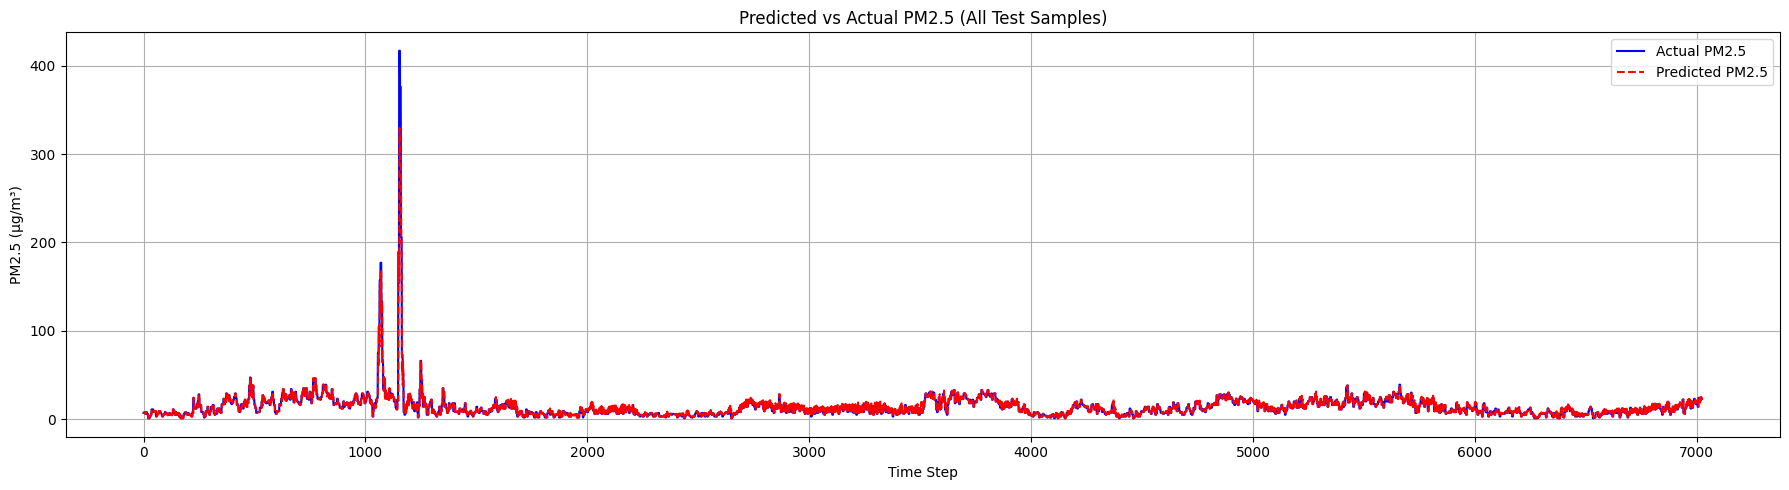

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.plot(y_test_inv, label='Actual PM2.5', color='blue')
plt.plot(y_pred_inv, label='Predicted PM2.5', color='red', linestyle='dashed')
plt.title("Predicted vs Actual PM2.5 (All Test Samples)")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


879/879 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


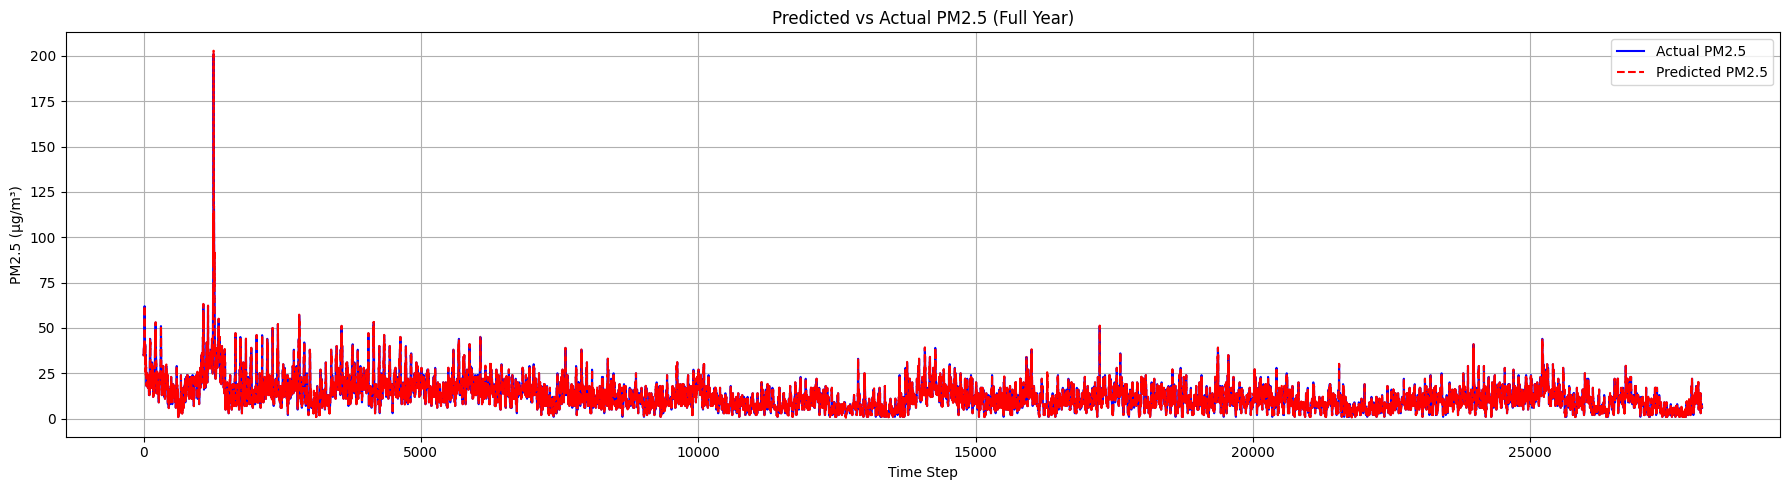

In [ ]:
y_full_pred = model.predict(X_train)

# Inverse transform
pm25_index = features.index('PM2.5')

# Pad with zeros to match scaler shape
y_full_pred_inv = scaler.inverse_transform(
    np.hstack((y_full_pred, np.zeros((len(y_full_pred), len(features)-1))))
)[:, pm25_index]

y_full_actual_inv = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((len(y_train), len(features)-1))))
)[:, pm25_index]

# Plot entire year (training + testing)
plt.figure(figsize=(18, 5))
plt.plot(y_full_actual_inv, label='Actual PM2.5', color='blue')
plt.plot(y_full_pred_inv, label='Predicted PM2.5', color='red', linestyle='dashed')
plt.title("Predicted vs Actual PM2.5 (Full Year)")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mae = mean_absolute_error(y_full_actual_inv, y_full_pred_inv)
rmse = np.sqrt(mean_squared_error(y_full_actual_inv, y_full_pred_inv))
r2 = r2_score(y_full_actual_inv, y_full_pred_inv)

print("MAE (Full Data):", mae)
print("RMSE (Full Data):", rmse)
print("R² (Full Data):", r2)

MAE (Full Data): 0.8616814137716279
RMSE (Full Data): 2.3854809540728223
R² (Full Data): 0.9227584167602109


220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


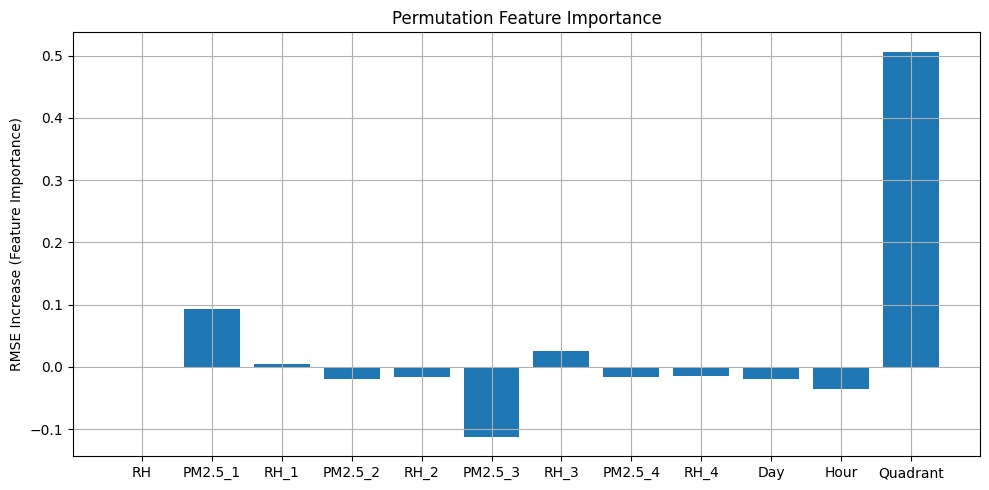

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def permutation_feature_importance(model, X_original, y_true, scaler, features, pm25_index):
    base_pred = model.predict(X_original)
    base_pred_inv = scaler.inverse_transform(np.hstack((base_pred, np.zeros((len(base_pred), len(features)-1)))))[:, pm25_index]
    y_true_inv = scaler.inverse_transform(np.hstack((y_true.reshape(-1, 1), np.zeros((len(y_true), len(features)-1)))))[:, pm25_index]
    base_rmse = np.sqrt(mean_squared_error(y_true_inv, base_pred_inv))

    importances = []
    for i in range(1,X_original.shape[2]):  # iterate over features
        X_permuted = X_original.copy()
        np.random.shuffle(X_permuted[:, :, i])  # shuffle only the i-th feature
        permuted_pred = model.predict(X_permuted)
        permuted_pred_inv = scaler.inverse_transform(np.hstack((permuted_pred, np.zeros((len(permuted_pred), len(features)-1)))))[:, pm25_index]
        permuted_rmse = np.sqrt(mean_squared_error(y_true_inv, permuted_pred_inv))
        importances.append(permuted_rmse - base_rmse)

    return importances

# Calculate importance scores
importances = permutation_feature_importance(model, X_test, y_test, scaler, features, pm25_index)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(features[1:], importances)  # exclude PM2.5 as it's the target
plt.ylabel("RMSE Increase (Feature Importance)")
plt.title("Permutation Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.save("pm25_spatial_model.keras")
from google.colab import files
files.download("pm25_spatial_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(scaler, "scaler_PM25_spatial.save")
files.download("scaler_PM25_spatial.save")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>